<a href="https://colab.research.google.com/github/Venu2791/Deep-Vision/blob/master/Assignment%203/1st_DNN_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
!pip install -q keras-vis
import vis

Importing Different different classes in keras for building CNN

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Importing matplotlib and plotting a sample image from train dataset

(60000, 28, 28)


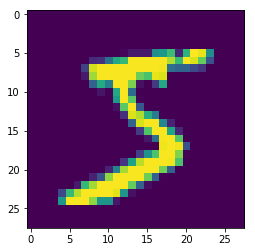

In [413]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


Changing shape of the image to keep it in gray scale.


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Convert the data to float type

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [416]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One - hot encoding of the output class.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [418]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

This code chunk creates sequential model by stacking convolutions to build CNN

Shape of channels in each layer

1. 28X28X1      | 3X3X1X32            -> 26X26X32 </br>
2. 26X26X1      | 1X1X32X10         -> 26X26X10</br> 
3. 26X26X10   | 26X26X10X10   -> 1X1X10</br>




In [419]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


When we see the model summary. The receptive field is 28, which is equal to  the size of the object. # of parameters is 68,000.

In [420]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_619 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_620 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_621 (Conv2D)          (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_77 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_77 (Activation)   (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


Model is complied here with adam optimizer and categorical_crossentropy is set as the loss function.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Model Fit:**

*   Model for 10 Epocs (iterations on entire dataset)

*  Each Epoch runs through the entire dataset once.

*  Batch size 32 refers to number of images at each step. So we have (60000/32)1875 steps in each epoch




    
    .

In [422]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2063 - acc: 0.9411
Epoch 2/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0735 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0540 - acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0416 - acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0329 - acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0263 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0210 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0166 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0126 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 18s 296us/step - loss: 


**model.evaluate()**

  Returns loss value and metrics of test data



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [427]:
print(score)

[0.08888979996535855, 0.9795]


In [0]:
y_pred = model.predict(X_test)

In [429]:
print(y_pred[:9])
print(y_test[:9])

[[7.51665404e-21 6.73802732e-17 4.26085409e-13 1.58752234e-09
  1.84353171e-22 2.41751210e-17 1.86718149e-33 1.00000000e+00
  9.06352833e-14 3.71310448e-12]
 [1.56026372e-11 1.93214542e-10 1.00000000e+00 3.60156978e-12
  6.54381767e-23 8.14828821e-17 6.11056428e-10 2.89486191e-25
  1.08061875e-11 2.60514738e-22]
 [6.91989888e-09 9.99999404e-01 7.01313922e-08 7.11945433e-11
  2.65217864e-07 4.26999235e-11 3.72404121e-11 1.68870443e-07
  3.76965517e-08 1.04219335e-12]
 [1.00000000e+00 2.68207110e-19 4.91745290e-11 1.70215241e-17
  5.11562571e-18 2.04690234e-15 3.82168075e-08 4.99245090e-12
  5.89624920e-12 8.33205900e-13]
 [6.78130078e-12 4.26050896e-11 4.76973929e-12 1.03799868e-11
  1.00000000e+00 1.76993186e-13 2.87441213e-13 2.76957977e-08
  3.78060555e-10 8.32321234e-09]
 [4.24455089e-12 9.99993920e-01 2.01011305e-10 2.52608134e-12
  1.44932557e-07 2.05729446e-14 4.13235798e-14 5.98806082e-06
  3.29974483e-08 3.46219879e-13]
 [2.16272743e-22 2.91104030e-10 1.18903262e-10 1.81868565e

***Problem Statement:***

The task is to get 99.4% validation accuracy in the model.

Note: The receptive field  should be 24 and Number of parameters should be less than 20000.

Shape of channels in each layer

1.  28X28X1      | 3X3X1X10             -> 26X26X10 </br>
2.  26X26X1      | 3X3X10X16          -> 24X24X16</br> 
3.  24X24X10   | 3X3X16X 24         -> 22X22X24</br>
4.  22X22X24 -maxpooling             -> 11X11X24</br>
5.  11X11X24   | 1X1X16X10          -> 11X11X10</br>
6.  11X11X10   | 3X3X10X10          -> 9X9X10</br>
7.  9X9X10        | 3X3X10X16           -> 7X7X16</br>
8.  7X7X10        | 3X3X16X16           -> 5X5X16</br>
9.  5X5X10        | 3X3X16X32           -> 3X3X32</br>
10.3X3X32        | 3X3X32X10           -> 1X1X10</br>


In [552]:
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(24, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(24, 3,3,activation='relu'))
model.add(Convolution2D(24, 3,3,activation='relu'))
model.add(Convolution2D(10, 3,3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/

In [553]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_795 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_796 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_797 (Conv2D)          (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_798 (Conv2D)          (None, 11, 11, 10)        250       
_________________________________________________________________
conv2d_799 (Conv2D)          (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_800 (Conv2D)          (None, 7, 7, 16)          2320      
__________

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
optimizer = optimizer=keras.optimizers.adam(lr=.001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [556]:
model.fit(X_train, Y_train,  batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.2109 - acc: 0.9344
Epoch 2/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.0718 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0533 - acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 28s 474us/step - loss: 0.0432 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0376 - acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 29s 475us/step - loss: 0.0326 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 28s 474us/step - loss: 0.0286 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0267 - acc: 0.9912
Epoch 9/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0231 - acc: 0.9922
Epoch 10/10
60000/60000 [==============================] - 28s 473us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [562]:
print(score)

[0.05953878955056425, 0.9821]


In [0]:
y_pred = model.predict(X_test)

In [560]:
print(y_pred[:9])
print(y_test[:9])

[[3.50792630e-14 1.35494740e-12 2.57483479e-09 2.29541985e-08
  6.59726668e-13 1.25014399e-09 1.17477923e-22 9.99939561e-01
  2.31917969e-08 6.03555272e-05]
 [3.68314788e-11 1.64219682e-06 9.99988079e-01 6.26839039e-07
  1.62978540e-06 2.67095165e-11 8.01490478e-06 2.08376392e-08
  3.83589896e-11 1.22683276e-13]
 [4.26221369e-09 9.99998569e-01 4.80678537e-08 5.90430771e-09
  9.19939737e-07 2.50275804e-07 1.37734304e-08 2.74224874e-07
  1.79745996e-08 3.89438881e-09]
 [9.51121449e-01 7.73511880e-11 3.03493903e-06 3.39342546e-06
  3.36317129e-07 1.64067023e-03 4.69961986e-02 1.13621668e-09
  1.29840802e-04 1.04929619e-04]
 [3.03490848e-12 3.79043570e-08 4.43721532e-10 1.06059428e-09
  9.99896884e-01 4.18317070e-09 6.31216892e-08 9.02361876e-07
  1.60564059e-06 1.00586476e-04]
 [2.26967445e-09 9.99997973e-01 1.67359531e-08 2.55376720e-09
  1.61676064e-06 4.74465978e-08 3.01365666e-09 4.18700608e-07
  1.32162192e-08 3.10411785e-09]
 [6.48783327e-13 2.89138370e-06 5.03459660e-07 3.47976538e

Kernel Extract (Feature Maps):

The below code is to visualize the extract of the kernel of each layer from the convolution layer. With this we could find when the edges are formed so that max pooling could be exactly applied at that point. 

{'conv2d_795': <keras.layers.convolutional.Conv2D object at 0x7fc2bc30ea90>, 'conv2d_796': <keras.layers.convolutional.Conv2D object at 0x7fc2bc30eb00>, 'conv2d_797': <keras.layers.convolutional.Conv2D object at 0x7fc2bc30ed30>, 'max_pooling2d_115': <keras.layers.pooling.MaxPooling2D object at 0x7fc2bc337e80>, 'conv2d_798': <keras.layers.convolutional.Conv2D object at 0x7fc2bc30ee48>, 'conv2d_799': <keras.layers.convolutional.Conv2D object at 0x7fc2bc337ac8>, 'conv2d_800': <keras.layers.convolutional.Conv2D object at 0x7fc2bc2e6550>, 'conv2d_801': <keras.layers.convolutional.Conv2D object at 0x7fc2bc2fb128>, 'conv2d_802': <keras.layers.convolutional.Conv2D object at 0x7fc2bc2fb7b8>, 'conv2d_803': <keras.layers.convolutional.Conv2D object at 0x7fc2bc2ab320>, 'flatten_98': <keras.layers.core.Flatten object at 0x7fc2bc254780>, 'activation_98': <keras.layers.core.Activation object at 0x7fc2bc254da0>}


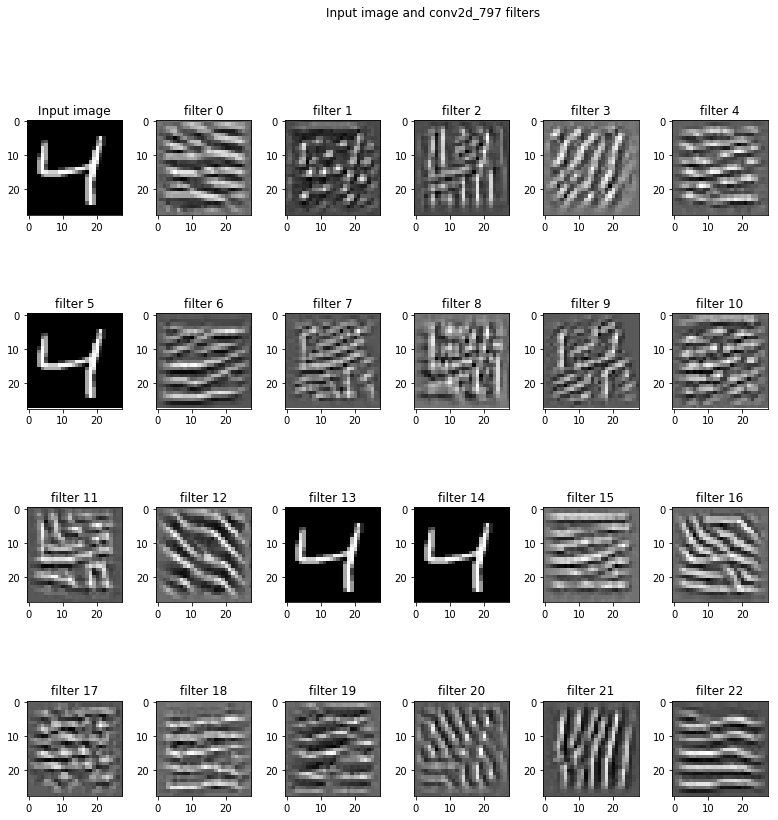

In [561]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K

layer_dict = dict([(layer.name, layer) for layer in model.layers])
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_797'):
  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()